**Assignment7: Word Embedding using Word2vec and Gensim and ploting of similarity graph**

In [11]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk.corpus import stopwords

In [5]:
paragraph = """ What is a ‘novel’ coronavirus?
A novel coronavirus (CoV) is a new strain of coronavirus.

The disease caused by the novel coronavirus first identified in Wuhan, China, has been named coronavirus disease 2019 (COVID-19) – ‘CO’ stands for corona, ‘VI’ for virus, and ‘D’ for disease.
Formerly, this disease was referred to as ‘2019 novel coronavirus’ or ‘2019-nCoV.’

The COVID-19 virus is a new virus linked to the same family of viruses as Severe Acute Respiratory Syndrome (SARS) and some types of common cold.
How does the COVID-19 virus spread?

The virus is transmitted through direct contact with respiratory droplets of an infected person (generated through coughing and sneezing), and touching surfaces contaminated with the virus. The COVID-19 virus may survive on surfaces for several hours, but simple disinfectants can kill it.
What are the symptoms of coronavirus?

Symptoms can include fever, cough and shortness of breath. In more severe cases, infection can cause pneumonia or breathing difficulties. More rarely, the disease can be fatal.

These symptoms are similar to the flu (influenza) or the common cold, which are a lot more common than COVID-19. This is why testing is required to confirm if someone has COVID-19. It’s important to remember that key prevention measures are the same – frequent hand washing, and respiratory hygiene (cover your cough or sneeze with a flexed elbow or tissue, then throw away the tissue into a closed bin).
How can I avoid the risk of infection?

Here are four precautions you and your family can take to avoid infection:
icon 1

Wash your hands frequently using soap and water or an alcohol-based hand rub.
icon 2

Cover mouth and nose with flexed elbow or tissue when coughing or sneezing. Dispose used tissue immediately.
icon 3

Avoid close contact with anyone who has cold or flu-like symptoms.
icon 4

Seek medical care early if you or your child has a fever, cough or difficulty breathing.
Should I wear a medical mask?

The use of a medical mask is advised if you have respiratory symptoms (coughing or sneezing) to protect others. If you don’t have any symptoms, then there is no need to wear a mask.

If masks are worn, they must be used and disposed of properly to ensure their effectiveness and to avoid any increased risk of transmitting the virus.

The use of a mask alone is not enough to stop infections and must be combined with frequent hand washing, covering sneezes and coughs, and avoiding close contact with anyone with cold or flu-like symptoms (coughing, sneezing, fever).
Does COVID-19 affect children?

This is a new virus and we do not know enough yet about how it affects children or pregnant women. We know it is possible for people of any age to be infected with the virus, but so far there have been relatively few cases of COVID-19 reported among children. The virus is fatal in rare cases, so far mainly among older people with pre-existing medical conditions.
What should I do if my child has symptoms of COVID-19?

Seek medical attention, but remember that it’s flu season in the Northern Hemisphere, and symptoms of COVID-19 such as cough or fever can be similar to those of the flu, or the common cold – which are a lot more frequent.

Continue to follow good hand and respiratory hygiene practices like regular handwashing, and keep your child up to date with vaccinations – so that your child is protected against other viruses and bacteria causing diseases.

As with other respiratory infections like the flu, seek care early if you or your child are having symptoms, and try to avoid going to public places (workplace, schools, public transport), to prevent spread to others.
What should I do if a family member displays symptoms?

You should seek medical care early if you or your child has a fever, cough or difficulty breathing. Consider calling ahead to tell your health care provider if you have traveled to an area where COVID-19 has been reported, or if you have been in close contact with someone with who has traveled from one of these areas and has respiratory symptoms.
Should I take my child out of school?

If your child is having symptoms, seek medical care, and follow the instructions from the health care provider. Otherwise, as with other respiratory infections like the flu, keep your child well rested at home while symptomatic, and avoid going to public places, to prevent spread to others.

If your child isn’t displaying any symptoms such as a fever or cough – and unless a public health advisory or other relevant warning or official advice has been issued affecting your child’s school – it’s best to keep your child in class.

Instead of keeping children out of school, teach them good hand and respiratory hygiene practices for school and elsewhere, like frequent handwashing (see below), covering cough or sneeze with a flexed elbow or tissue, then throwing away the tissue into a closed bin, not touching their eyes, mouths or noses if they haven’t properly washed their hands.
What is the best way to wash hands properly?

Step 1:Wet hands with running water

Step 2: Apply enough soap to cover wet hands

Step 3: Scrub all surfaces of the hands – including back of hands, between fingers and under nails – for at least 20 seconds

Step 4: Rinse thoroughly with running water

Step 5: Dry hands with a clean cloth or single-use towel

Wash your hands often, especially before eating; after blowing your nose, coughing, or sneezing; and going to the bathroom.

If soap and water are not readily available, use an alcohol-based hand sanitizer with at least 60% alcohol. Always wash hands with soap and water, if hands are visibly dirty.
What precautions should I take for my family if we travel?

Anyone planning a trip overseas should always check the travel advisory for their destination country for any restrictions on entry, quarantine requirements on entry, or other relevant travel advice.

In addition to taking standard travel precautions, and in order to avoid being quarantined or denied re-entry into your home country, you are also advised to check the latest COVID-19 update on the International Air Transport Association website, which includes a list of countries and restriction measures.

While traveling, all parents should follow standard hygiene measures for themselves and their children: Wash hands frequently or use an alcohol-based sanitizer with at least 60 per cent alcohol, practice good respiratory hygiene (cover your mouth and nose with your bent elbow or tissue when you cough or sneeze and immediately dispose of the used tissue) and avoid close contact with anyone who is coughing or sneezing.

In addition, it is recommended that parents always carry a hand sanitizer, pack of disposable tissues, and disinfecting wipes.

Additional recommendations include: Clean your seat, armrest, touchscreen, etc. with a disinfecting wipe once inside an aircraft or other vehicle. Also use a disinfecting wipe to clean key surfaces, doorknobs, remote controls, etc at the hotel or other accommodation where you and your children are staying.
Can pregnant women pass coronavirus to unborn children?

At this time, there is not enough evidence to determine whether the virus is transmitted from a mother to her baby during pregnancy, or the potential impact this may have on the baby. This is currently being investigated. Pregnant women should continue to follow appropriate precautions to protect themselves from exposure to the virus, and seek medical care early, if experiencing symptoms, such as fever, cough or difficulty breathing.

Is it safe for a mother to breastfeed if she is infected with coronavirus?

All mothers in affected and at-risk areas who have symptoms of fever, cough or difficulty breathing, should seek medical care early, and follow instructions from a health care provider.

Considering the benefits of breastfeeding and the insignificant role of breastmilk in the transmission of other respiratory viruses, the mother can continue breastfeeding, while applying all the necessary precautions.

For symptomatic mothers well enough to breastfeed, this includes wearing a mask when near a child (including during feeding), washing hands before and after contact with the child (including feeding), and cleaning/disinfecting contaminated surfaces – as should be done in all cases where anyone with confirmed or suspected COVID-19 interacts with others, including children.

If a mother is too ill, she should be encouraged to express milk and give it to the child via a clean cup and/or spoon – all while following the same infection prevention methods."""

In [8]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [9]:
# Preparing the dataset
sentences = nltk.sent_tokenize(cleaned_text)
sentences

[' what is a ‘novel’ coronavirus a novel coronavirus cov is a new strain of coronavirus the disease caused by the novel coronavirus first identified in wuhan china has been named coronavirus disease covid  – ‘co’ stands for corona ‘vi’ for virus and ‘d’ for disease formerly this disease was referred to as ‘ novel coronavirus’ or ‘ ncov’ the covid virus is a new virus linked to the same family of viruses as severe acute respiratory syndrome sars and some types of common cold how does the covid virus spread the virus is transmitted through direct contact with respiratory droplets of an infected person generated through coughing and sneezing and touching surfaces contaminated with the virus the covid virus may survive on surfaces for several hours but simple disinfectants can kill it what are the symptoms of coronavirus symptoms can include fever cough and shortness of breath in more severe cases infection can cause pneumonia or breathing difficulties more rarely the disease can be fatal 

In [10]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
sent_word

[['what',
  'is',
  'a',
  '‘',
  'novel',
  '’',
  'coronavirus',
  'a',
  'novel',
  'coronavirus',
  'cov',
  'is',
  'a',
  'new',
  'strain',
  'of',
  'coronavirus',
  'the',
  'disease',
  'caused',
  'by',
  'the',
  'novel',
  'coronavirus',
  'first',
  'identified',
  'in',
  'wuhan',
  'china',
  'has',
  'been',
  'named',
  'coronavirus',
  'disease',
  'covid',
  '–',
  '‘',
  'co',
  '’',
  'stands',
  'for',
  'corona',
  '‘',
  'vi',
  '’',
  'for',
  'virus',
  'and',
  '‘',
  'd',
  '’',
  'for',
  'disease',
  'formerly',
  'this',
  'disease',
  'was',
  'referred',
  'to',
  'as',
  '‘',
  'novel',
  'coronavirus',
  '’',
  'or',
  '‘',
  'ncov',
  '’',
  'the',
  'covid',
  'virus',
  'is',
  'a',
  'new',
  'virus',
  'linked',
  'to',
  'the',
  'same',
  'family',
  'of',
  'viruses',
  'as',
  'severe',
  'acute',
  'respiratory',
  'syndrome',
  'sars',
  'and',
  'some',
  'types',
  'of',
  'common',
  'cold',
  'how',
  'does',
  'the',
  'covid',
  'vir

In [12]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [13]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)

words = model.wv.vocab

In [14]:
# Test the word vectors
vector = model.wv['coronavirus']

print(vector)

[ 2.2953572e-03 -4.5633037e-03 -1.0445419e-03  2.8238215e-03
 -9.9463679e-04 -3.0802528e-03  1.6077205e-03 -2.1036197e-03
 -3.1870671e-03 -4.9876459e-03  1.7912776e-03  4.7029830e-03
 -4.1846791e-03  3.1190717e-03 -3.3755144e-03 -4.6889880e-03
 -3.0550850e-03  2.3339104e-04  4.4842828e-03  9.2978746e-04
 -2.0645042e-03  3.6669830e-03  6.5368350e-04 -2.8622479e-03
 -4.3655690e-03  4.4191130e-03 -4.0309094e-03  3.7109444e-03
  2.5885913e-04  2.1011056e-03  1.6132554e-03 -1.8370220e-03
  6.2869408e-04 -4.8522637e-03  4.6210960e-03  1.8729835e-03
 -4.2827958e-03 -3.2832588e-03 -2.2528032e-03 -4.3943981e-03
  3.4952519e-04  2.1628570e-03 -6.3763018e-04 -1.5128758e-03
 -2.1488778e-03 -8.4760640e-04  1.9382330e-03 -2.1748787e-03
 -8.5762993e-04  5.0545591e-03  2.9227848e-03  1.0647489e-03
 -5.2719108e-05  2.1874306e-03 -4.1525639e-03 -4.5753648e-03
  3.2782294e-03 -2.4876306e-03  1.5182300e-03  1.7091706e-03
  1.6764153e-03  1.1317104e-03 -2.4202138e-03  2.1481055e-03
  3.2515172e-04 -3.79905

In [17]:
# Most similar words
similar = model.wv.most_similar('symptoms',topn=5)

similar

[('trip', 0.26560577750205994),
 ('mouth', 0.2626901865005493),
 ('fatal', 0.2611756920814514),
 ('good', 0.23986075818538666),
 ('rested', 0.23716863989830017)]

# Checking similarity of words/tokens

In [19]:
model.wv.similarity(w1='symptoms',w2='health')

0.009591889

In [20]:
model.wv.similarity(w1='coronavirus',w2='health')

-0.015514623

In [21]:
model.wv.similarity(w1='coronavirus',w2='virus')

0.06816987

In [22]:
model.wv.similarity(w1='spread',w2='virus')

-0.060977533

In [23]:
model.wv.similarity(w1='nose',w2='respiratory')

-0.1946781

In [24]:
model.wv.similarity(w1='washing',w2='virus')

-0.09618719

In [25]:
model.wv.similarity(w1='fever',w2='infection')

0.25533324

#  Plotting 2D graph to see words similarity of below 20 words

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


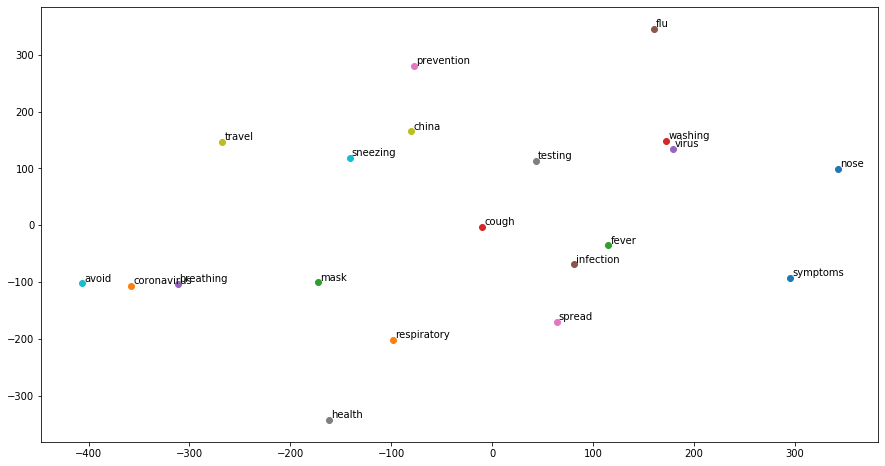

In [18]:
from sklearn.manifold import  TSNE
vocab = ['symptoms','coronavirus','fever','cough','breathing','infection','prevention','testing','china',
         'sneezing','nose','respiratory','mask','washing','virus','flu','spread','health','travel','avoid']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)